In [34]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv("NewData.csv")#.drop(columns = ['Unnamed: 19']).dropna(axis = 0)

In [36]:
df.head(10)

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,1,79,160,60.0,13.40,1,142,80,86,0,0,4.22,26.2,13.5,6.74,69.6,0.58,6.34,0
1,1,81,153,38.0,16.20,0,132,74,69,0,0,6.27,19.9,16.2,3.70,51.6,0.88,4.96,0
2,1,85,157,40.0,16.23,1,160,90,89,0,0,5.50,14.3,9.3,6.95,98.3,0.94,3.80,0
3,1,78,155,40.0,16.65,0,126,74,58,0,0,6.70,17.8,11.3,5.40,68.6,1.82,3.16,1
4,0,43,166,46.0,16.70,1,136,84,77,0,0,5.72,25.9,57.9,3.10,56.0,2.74,5.26,0
5,0,68,158,43.0,17.20,0,132,78,56,0,0,4.60,66.9,61.5,9.95,140.9,1.31,5.94,0
6,0,76,170,50.0,17.30,1,150,90,70,0,0,4.69,15.1,13.9,7.44,104.4,2.71,5.21,0
7,1,77,157,43.0,17.40,1,138,76,63,0,0,4.97,17.1,8.8,4.62,55.0,1.08,4.47,1
8,1,79,160,45.0,17.58,0,130,72,66,0,0,7.78,21.3,19.5,5.92,62.4,3.63,4.40,0
9,1,83,160,45.0,17.60,1,150,90,66,0,0,5.29,20.1,16.2,5.83,91.2,4.07,4.17,0


In [37]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'SBP',
       'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr', 'TG',
       'TC', 'Outcome'],
      dtype='object')

In [38]:
df.describe()

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
count,682.00000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.63783,66.412023,162.781525,63.495968,23.859106,0.653959,139.595308,83.341642,67.900293,0.027859,0.021994,6.050762,21.901510,21.373754,5.828021,67.579135,1.676041,5.070367,0.260997
std,0.48098,10.061282,7.156777,9.653883,2.902418,0.476056,15.607724,9.043166,9.212870,0.164690,0.146772,1.563503,11.339964,16.113156,2.799483,30.909277,1.224666,5.131881,0.439501
min,0.00000,17.000000,145.000000,38.000000,13.400000,0.000000,100.000000,62.000000,20.000000,0.000000,0.000000,2.400000,1.400000,4.300000,0.570000,5.850000,0.320000,1.920000,0.000000
25%,0.00000,62.000000,158.000000,58.000000,22.000000,0.000000,130.000000,78.000000,62.000000,0.000000,0.000000,5.192500,16.800000,13.900000,4.720000,54.700000,0.940000,4.210000,0.000000
50%,1.00000,67.500000,162.000000,63.000000,23.700000,1.000000,136.000000,82.000000,68.000000,0.000000,0.000000,5.705000,20.000000,18.200000,5.525000,63.100000,1.330000,4.850000,0.000000
75%,1.00000,72.000000,168.000000,70.000000,25.600000,1.000000,150.000000,90.000000,73.000000,0.000000,0.000000,6.300000,24.075000,25.000000,6.520000,74.175000,1.960000,5.490000,1.000000
max,1.00000,91.000000,185.000000,110.000000,34.700000,1.000000,190.000000,135.000000,106.000000,1.000000,1.000000,18.800000,172.800000,262.000000,61.800000,682.500000,10.990000,136.400000,1.000000


In [39]:
#data = df.drop(columns = ['Unnamed: 19']).astype('float').values
data =df.values

In [40]:
data.shape

(682, 19)

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()
result_feature = scaler.fit_transform(data[:,:18])
result_label = data[:,18]

In [42]:
result = np.append(result_feature, result_label.reshape(len(result_label),1), axis = 1)

In [43]:
result.shape

(682, 19)

In [44]:
#df_newdata = pd.DataFrame(result, columns=df.drop(columns = ['Unnamed: 19']).columns)
df_newdata = pd.DataFrame(result, columns= df.columns)

In [45]:
df_newdata

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,0.753536,1.252049,-0.388941,-0.362397,-3.606228,0.727426,0.154184,-0.369792,1.966053,-0.169286,-0.149963,-1.171796,0.379335,-0.489012,0.326006,0.065429,-0.895628,0.247583,0.0
1,0.753536,1.450976,-1.367753,-2.642945,-2.640807,-1.374711,-0.486995,-1.033764,0.119454,-0.169286,-0.149963,0.140325,-0.176630,-0.321324,-0.760706,-0.517348,-0.650484,-0.021522,0.0
2,0.753536,1.848832,-0.808432,-2.435622,-2.630463,0.727426,1.308305,0.736827,2.291923,-0.169286,-0.149963,-0.352521,-0.670821,-0.749860,0.401075,0.994634,-0.601455,-0.247726,0.0
3,0.753536,1.152585,-1.088093,-2.435622,-2.485650,-1.374711,-0.871702,-1.033764,-1.075404,-0.169286,-0.149963,0.415550,-0.361952,-0.625647,-0.153005,0.033052,0.117636,-0.372528,1.0
4,-1.327077,-2.328650,0.450040,-1.813655,-2.468410,0.727426,-0.230523,0.072855,0.988442,-0.169286,-0.149963,-0.211708,0.352860,2.268522,-0.975188,-0.374892,0.869412,0.036979,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,-1.327077,1.152585,-0.808432,1.710829,2.965529,0.727426,0.923598,0.958150,-0.749534,-0.169286,-0.149963,0.543562,-0.247229,0.051315,-0.131557,0.968733,-0.111166,-0.089773,1.0
678,0.753536,-2.129722,-0.808432,1.710829,2.979321,-1.374711,-0.230523,-0.148469,0.662571,-0.169286,-0.149963,-0.608544,-1.782751,-0.929969,-0.406809,-0.549725,-0.838428,-0.304277,0.0
679,-1.327077,-0.438837,0.310210,2.747442,3.172405,-1.374711,-0.230523,-0.148469,0.010830,-0.169286,-0.149963,2.143710,-0.767895,-0.364799,0.880086,1.833185,0.460838,-0.161924,1.0
680,0.753536,0.456338,-0.808432,2.021813,3.393073,-1.374711,-0.615231,-0.369792,-0.097793,-0.169286,-0.149963,-0.141301,-0.167805,-0.495223,-0.042189,0.062191,-0.634141,-0.109273,1.0


In [46]:
df_newdata.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'SBP',
       'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr', 'TG',
       'TC', 'Outcome'],
      dtype='object')

In [47]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']

In [48]:
X.shape

(682, 18)

In [49]:
X

array([[  1.  ,  79.  , 160.  , ...,  69.6 ,   0.58,   6.34],
       [  1.  ,  81.  , 153.  , ...,  51.6 ,   0.88,   4.96],
       [  1.  ,  85.  , 157.  , ...,  98.3 ,   0.94,   3.8 ],
       ...,
       [  0.  ,  62.  , 165.  , ..., 124.2 ,   2.24,   4.24],
       [  1.  ,  71.  , 157.  , ...,  69.5 ,   0.9 ,   4.51],
       [  0.  ,  68.  , 178.  , ...,  52.8 ,   2.68,   4.29]])

In [50]:
Y.shape

(682,)

In [51]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
score = cross_val_score(classifier_lr, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8)
print(score)
print(sum(score)/len(score))


[0.88321168 0.86131387 0.89781022 0.83941606 0.89051095 0.90510949
 0.83211679 0.86861314 0.83941606 0.88321168]
0.87007299270073


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [52]:
#n_estimators为森林中树木数量，max_depth树的最大深度
#进行交叉验证，训练集和测试集为7:3的比例进行分配，
#ShuffleSplit()函数用于随机抽样（数据集总数，迭代次数，test所占比例）
rf = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))


[0.86956522 0.86956522 0.92753623 0.89855072 0.88405797 0.91304348
 0.91304348 0.89855072 0.82608696 0.92753623]
0.8927536231884057


In [68]:

from sklearn.ensemble import GradientBoostingClassifier
rf = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
#rf = GradientBoostingClassifier(n_estimators=40, max_depth= 4, max_features= 3, min_samples_leaf=1, min_samples_split=2)
score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.91304348 0.8115942  0.88405797 0.92753623 0.84057971 0.86956522
 0.85507246 0.88405797 0.94202899 0.82608696]
0.8753623188405797


In [54]:
from sklearn.svm import SVC
rf = SVC(C= 1, gamma=1, kernel = 'linear')

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.88405797 0.88405797 0.88405797 0.84057971 0.86956522 0.79710145
 0.88405797 0.88405797 0.94202899 0.88405797]
0.8753623188405799


In [55]:
from xgboost import XGBClassifier
from xgboost import plot_importance

#rf = XGBClassifier(learning_rate=0.01,
#                      n_estimators=10,           # 树的个数-10棵树建立xgboost
#                      max_depth=4,               # 树的深度
#                      min_child_weight = 1,      # 叶子节点最小权重
#                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
#                      subsample=1,               # 所有样本建立决策树
#                      colsample_btree=1,         # 所有特征建立决策树
#                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
#                      random_state=27,           # 随机数
#                      slient = 0)

rf = XGBClassifier(n_estimators=70, max_depth= 6, min_child_weight=1, learning_rate= 0.01)
#rf = XGBClassifier(learning_rate= 0.01, max_depth= 7,  n_estimators= 25)

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.85507246 0.85507246 0.86956522 0.84057971 0.82608696 0.86956522
 0.86956522 0.88405797 0.84057971 0.82608696]
0.8536231884057972


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

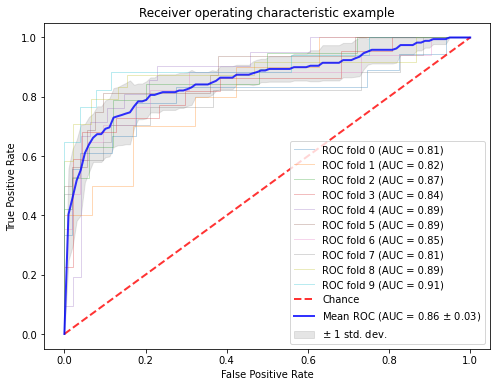

In [56]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = classifier_lr

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

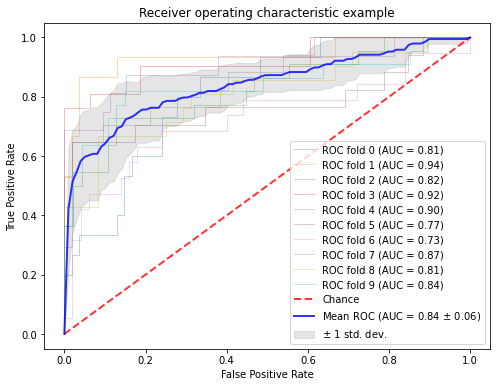

In [57]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = SVC(C= 20, kernel = 'linear')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

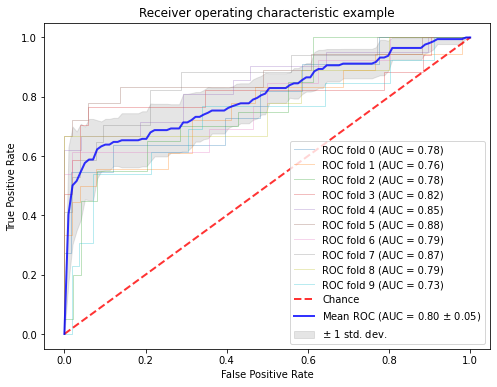

In [58]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

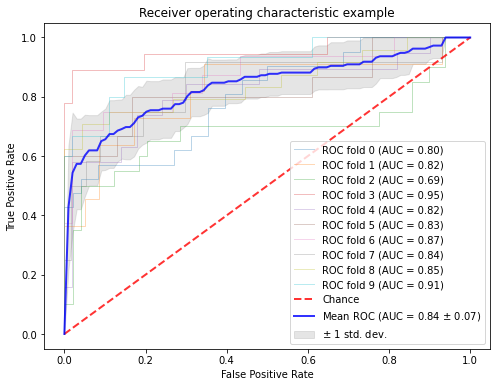

In [59]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

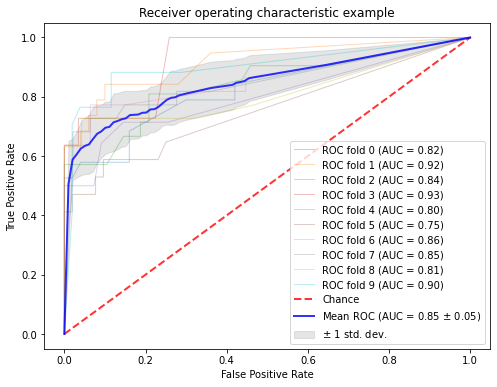

In [60]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()